In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


results = pd.read_json("results.json")

In [2]:
from IPython.display import display, Latex

with open("results.tex", "w") as f:
    f.write(results.to_latex())

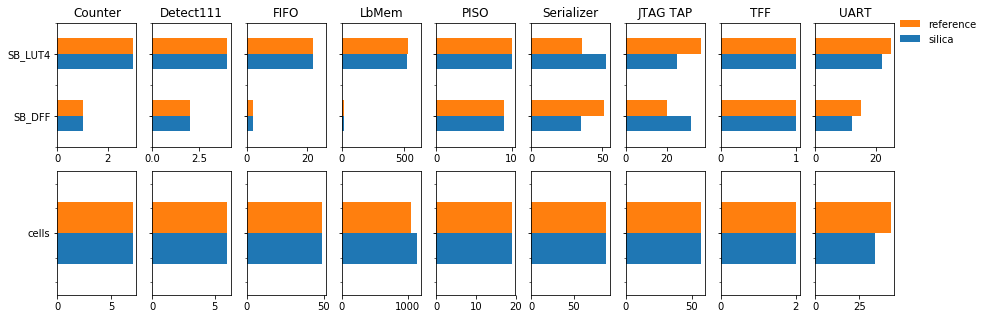

In [3]:
col_len = (len(results.columns) // 2)
fig, axes = plt.subplots(nrows=2, ncols=col_len, sharey='row')
fig.set_figwidth(15)
fig.set_figheight(5)

titles = ["Counter", "Detect111", "FIFO", "LbMem", "PISO", "Serializer", "JTAG TAP", "TFF", "UART"]

for row in range(0, 2):
    for i, columns in enumerate(zip(results.columns[::2], results.columns[1::2])):
        title = titles[i]
        curr = results[list(columns)].rename(index=str, columns={columns[0]: "silica", columns[1]: "reference"})
        curr = curr.loc[(curr != 0).all(axis=1), :]
        if row == 0:
            curr = curr.filter(like="SB_", axis=0)
        elif row == 1:
            curr = curr.filter(like="cells", axis=0)
        # elif row == 2:
        #     curr = curr.filter(regex="(wires|wire bits|public wires|memories|memory bits|processes)", axis=0)
        if not curr.empty:
            if row > 0:
                title = False
            curr.plot.barh(ax=axes[row, i], legend=False, title=title)

# plt.legend(bbox_to_anchor=(2.15, 3.37), labelspacing=-2.5, frameon=False)      
plt.legend(bbox_to_anchor=(2.15, 2.18), labelspacing=-2.5, frameon=False)      

plt.savefig("synthesis.pdf")
plt.show()

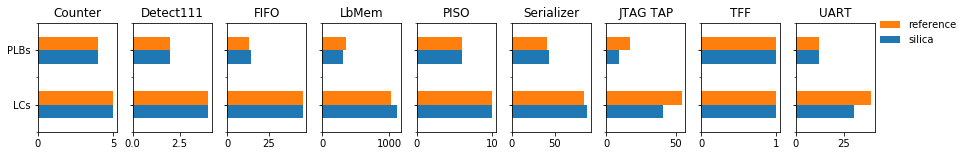

In [4]:
fig1, axes1 = plt.subplots(nrows=1, ncols=col_len, sharey='row')
fig1.set_figwidth(15)
fig1.set_figheight(2)


for i, columns in enumerate(zip(results.columns[::2], results.columns[1::2])):
    title = titles[i]
    curr = results[list(columns)].rename(index=str, columns={columns[0]: "silica", columns[1]: "reference"})
    curr = curr.loc[(curr != 0).all(axis=1), :]
    curr = curr.filter(regex="(LCs|PLBs)", axis=0)
    curr.plot.barh(ax=axes1[i], legend=False, title=title)
plt.legend(bbox_to_anchor=(2.15, .975), labelspacing=-2.5, frameon=False)      
            
plt.savefig("utilization.pdf")
plt.show()

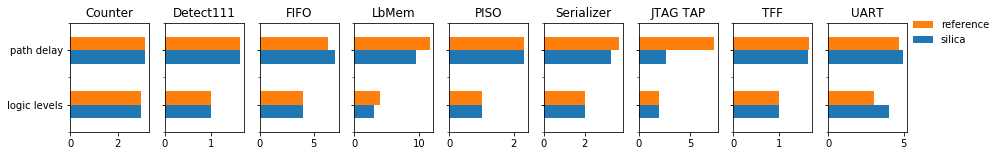

In [5]:
fig2, axes2 = plt.subplots(nrows=1, ncols=col_len, sharey='row')
fig2.set_figwidth(15)
fig2.set_figheight(2)


for i, columns in enumerate(zip(results.columns[::2], results.columns[1::2])):
    title = titles[i]
    curr = results[list(columns)].rename(index=str, columns={columns[0]: "silica", columns[1]: "reference"})
    curr = curr.loc[(curr != 0).all(axis=1), :]
    curr = curr.filter(regex="(logic levels|path delay)", axis=0)
    curr.plot.barh(ax=axes2[i], legend=False, title=title)
plt.legend(bbox_to_anchor=(2.15, .975), labelspacing=-2.5, frameon=False)      
            
plt.savefig("timing-delay.pdf")
plt.show()

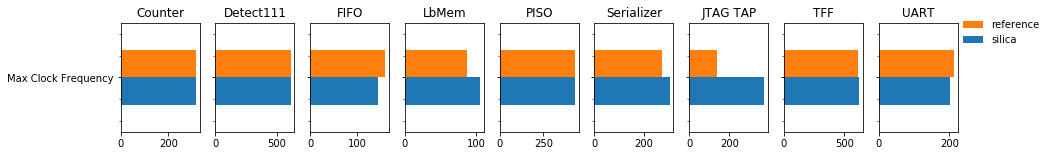

In [6]:
fig2, axes2 = plt.subplots(nrows=1, ncols=col_len, sharey='row')
fig2.set_figwidth(15)
fig2.set_figheight(2)


for i, columns in enumerate(zip(results.columns[::2], results.columns[1::2])):
    title = titles[i]
    curr = results[list(columns)].rename(index=str, columns={columns[0]: "silica", columns[1]: "reference"})
    curr = curr.loc[(curr != 0).all(axis=1), :]
    curr = curr.filter(regex="(Max Clock Frequency)", axis=0)
    curr.plot.barh(ax=axes2[i], legend=False, title=title)
plt.legend(bbox_to_anchor=(2.15, .975), labelspacing=-2.5, frameon=False)      
            
plt.savefig("timing-freq.pdf")
plt.show()